In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load tthe data
df = pd.read_csv(r"C:\Users\HP\Documents\Air Pollution Index\Train.csv")

In [3]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1600 non-null   float64
 1   feature_2  1600 non-null   float64
 2   feature_3  1600 non-null   float64
 3   feature_4  1600 non-null   float64
 4   feature_5  1600 non-null   float64
 5   target     1600 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [5]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


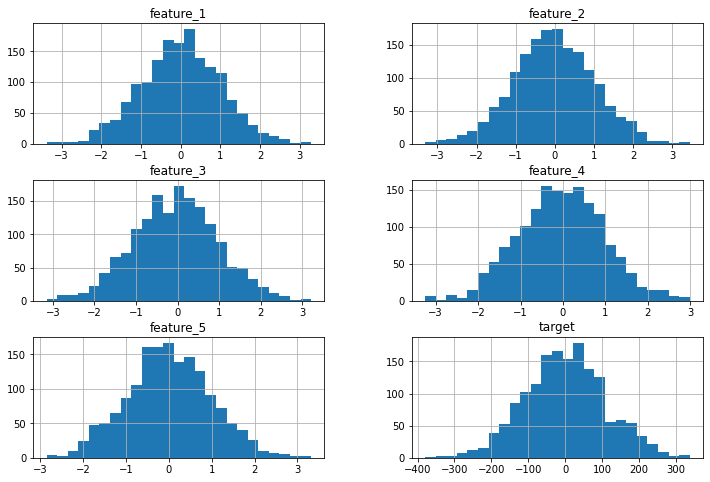

In [6]:
# Plotting frquency distribution for each variable 
df.hist(figsize = (12,8), bins = 25)
plt.show()

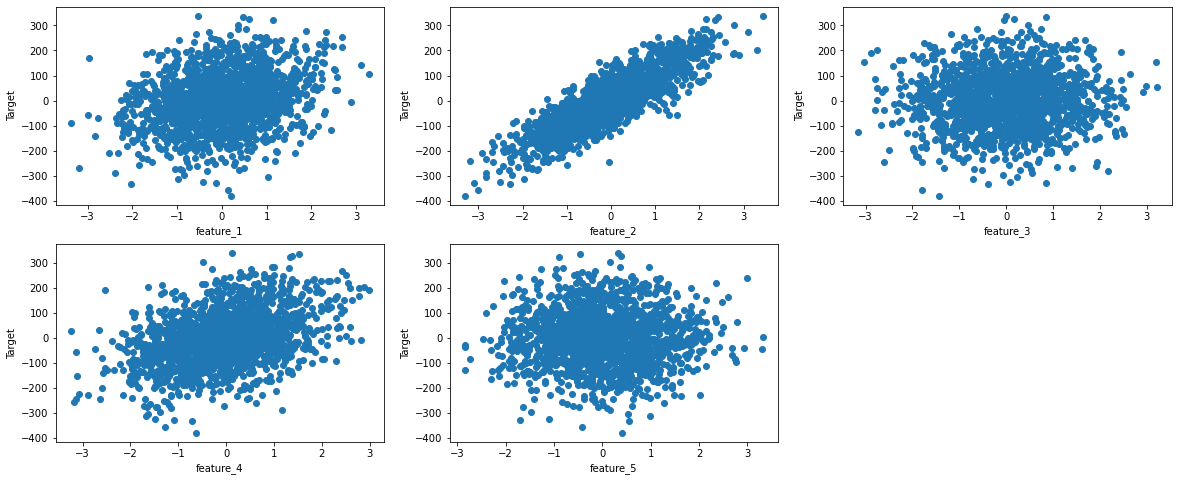

In [7]:
# plotting scatter plots between each feature and the target variable
plt.figure(figsize=(20,8))
for i, column in enumerate(df.columns):
    if column != 'target':
        plt.subplot(2,3,i+1)
        plt.scatter(x=df[column], y=df['target'])
        plt.xlabel(column)
        plt.ylabel('Target')

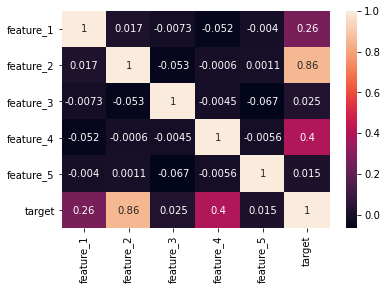

In [8]:
# Measure the correaltion and plot the heatmap
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

From the above heatmap and scatter plots, it seems that feature 2 and feature 4 are more important for predicting the target variable.

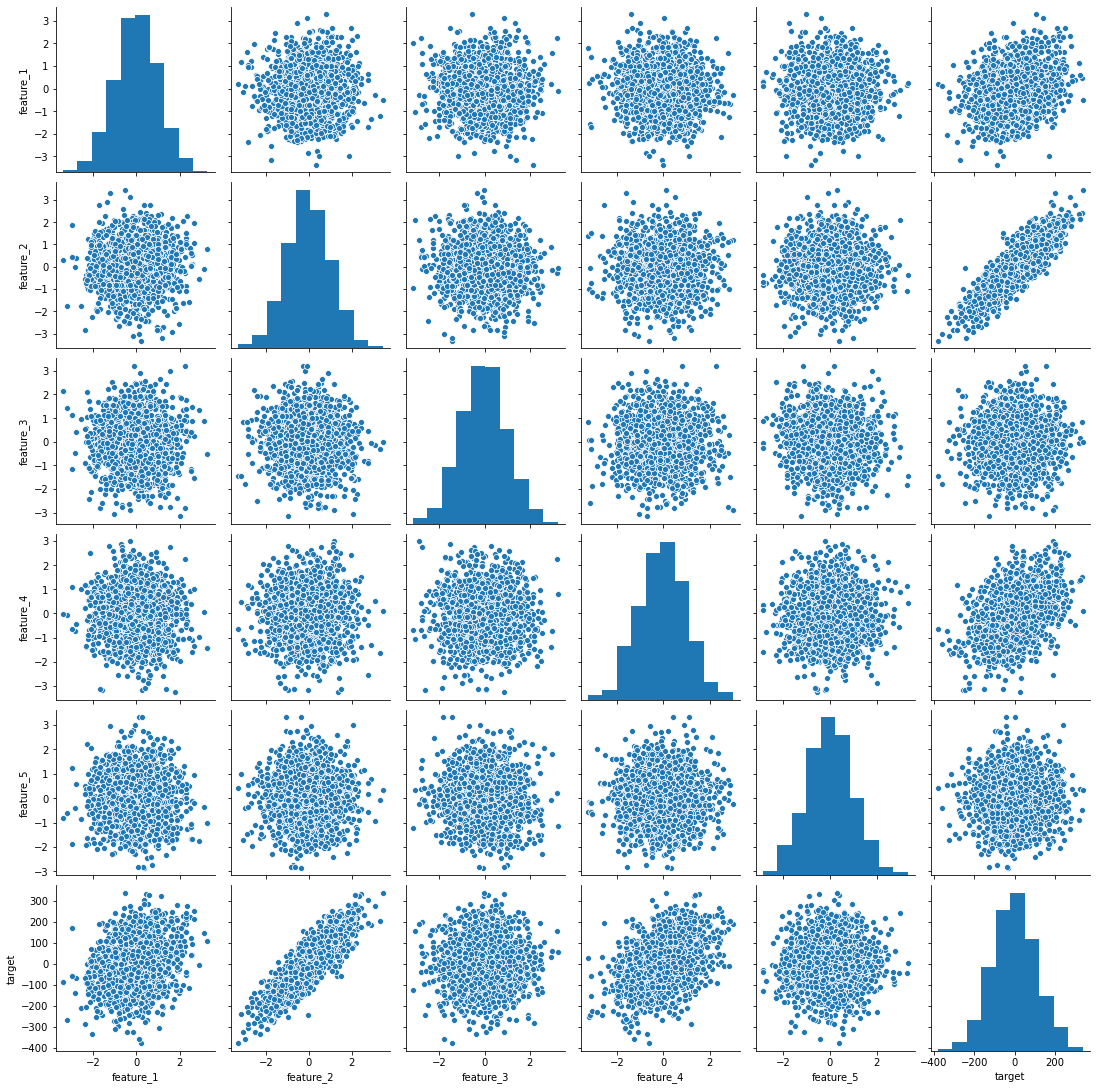

In [9]:
# Plotting pairplots
sns.pairplot(df)
plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [12]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Model Object
lr_reg = LinearRegression()

# Fit the model
lr_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# make predictions and check the error
lr_preds_1 = lr_reg.predict(X_test)

# Metrics
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(y_test, lr_preds_1) #--> Compute the mean squared error
rmse_1 = np.sqrt(mse_1) #--> Compute the Root Mean Squared Error

print('==== PERFROMANCE ====')
print('The mean squared error is {:.3f} '.format(mse_1))
print('The root mean squared error is {:.3f}'.format(rmse_1))

==== PERFROMANCE ====
The mean squared error is 430.015 
The root mean squared error is 20.737


In [14]:
predicted_dataframe = pd.concat([X_test, y_test], axis=1)
predicted_dataframe['Predicted_target'] = lr_preds_1

In [15]:
predicted_dataframe = predicted_dataframe.reset_index().drop('index',axis=1)

In [16]:
predicted_dataframe.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,Predicted_target
0,-1.388974,-0.579275,0.165478,-1.152241,0.215593,-130.704675,-139.846250
1,-0.469388,0.046899,-0.255776,0.730739,-0.675200,40.948583,23.689484
2,-0.908349,0.210797,-1.112608,-0.247731,0.776953,-42.893050,-20.676686
3,0.599657,-1.215359,0.507227,0.713332,-0.775190,-60.680781,-55.898719
4,-0.017961,-0.128795,-1.487866,-0.388995,0.369979,-27.789193,-35.757710
